In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [0]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    return X, t

In [0]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    t_1hot = np.zeros((len(t_indices), N))
    for i in range(len(t_indices)):
        t_1hot[i,t_indices[i]] = 1
    return t_1hot

In [4]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [0]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    Ns = X.shape[0]
    ind = np.arange(Ns)
    Ns_train = int((1-testFraction)*Ns)
    np.random.shuffle(ind)
    ind_train = ind[:Ns_train]
    ind_test = ind[Ns_train:]
    
    X_train = X[ind_train,:]
    t_train = t[ind_train,:]
    X_test = X[ind_test,:]
    t_test = t[ind_test,:]
    return X_train, t_train, X_test, t_test

In [6]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [0]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train_normalized = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    X_test_normalized = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
    return X_train_normalized, X_test_normalized

In [8]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [0]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = 1/(1+np.exp(-x))
    return y

In [10]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [0]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    exps = np.exp(x)
    y = exps / np.sum(exps)
    return y

In [12]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [0]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = x*(1-x)
    return y

In [0]:
class NeuralNetwork:
    def __init__(self, ni, nh, no):
        '''   
        Input:
            ni: int, size of input layer
            nh: int, size of hidden layer
            no: int, size of output layer
        Action:
            Creates instance variables
        NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        self.ni = ni
        self.nh = nh
        self.no = no
        self.weights1 = []
        self.weights2 = []
        return
    
    def init_weights(self):
        '''
        Action:
            Randomly initialize weights1 and weights2 with proper size random np arrays
        '''

        ### WRITE YOUR CODE HERE - 2 MARKS
        
        self.weights1= np.random.random((self.nh, self.ni))*2 -1
        self.weights2= np.random.random((self.no, self.nh+1))*2 - 1
        
    def predict(self, x):
        x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        return v2

    def backprop(self,x,y,eta):
        '''
        # application of the chain rule to find derivative of the categorical cross entropy loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
            # Finding the derivatives
            del_weights2: np array that stores the derivative of the loss function with respect to weights2
            del_weights1: np array that stores the derivative of the loss function with respect to weights1

            # Update the weights with the derivative of the categorical cross entropy loss function
              weights1 += eta*del_weights1
              weights2 += eta*del_weights2
        ''' 

        ### WRITE YOUR CODE HERE - 5 MARKS
        
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        
    
      ## backward propagation

        delta_weights2 = np.outer(v2-y,v1)
        delta_weights1 = np.outer((v1[1:]*(1-v1[1:]))*(self.weights2.T.dot(v2-y)[1:]),x)

      ## update weights
        self.weights1 = self.weights1 - eta*delta_weights1
        self.weights2 = self.weights2 - eta*delta_weights2 
 

    def fit(self, X, T, eta, epochs):
        '''
        input:
            X: training input data 
            t: training targets
            eta: learning rate
            epochs: number of epochs
        Action:
            train the weights
        '''
        ### WRITE YOUR CODE HERE - 5 MARKS
        loss_values = []
        for epochs in range(epochs):
            loss = 0
            for i in range(X.shape[0]):
                x=X[i]
                x = np.insert(x,0,1,axis=0)
                t=T[i]
                self.backprop(x,t,eta)
            for i in range(X.shape[0]):
                x = X[i]
                y = self.predict(x)    
                loss = loss - np.sum(T[i]*np.log(y),axis=0)   # categorical cross entropy loss 
            loss = loss/X.shape[0]
            loss_values.append(loss)
        plt.plot(loss_values)
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()

        
    def predict_label(self,x):    
        '''
        Output:
            y: np array of index
        '''

        ### WRITE YOUR CODE HERE - 1 MARKS
        y= np.argmax(self.predict(x),axis=0)

        return y

In [0]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(t,y)

    return CM

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

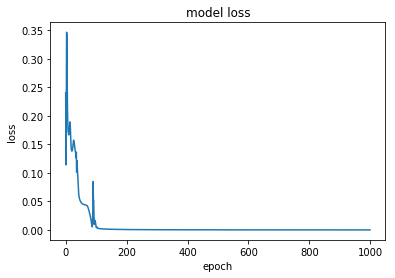

[[ 8  0  0]
 [ 0 10  0]
 [ 0  1 11]]


In [16]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,t = loadIrisData()
    t = one_hot_encoding(t, 3)
    X_train, t_train, X_test, t_test = splitData(X,t,testFraction=0.2)
    X_train,X_test = normalizeX(X_train, X_test)
    nn = NeuralNetwork(5,8,3)
    nn.init_weights()
    nn.fit(X_train, t_train, 1, 1000)
    y_test=[]
    for i in range(X_test.shape[0]):
        x = X_test[i]
        y_test.append(nn.predict_label(x))
        
 
    CM = getCM(y_test,t_test.argmax(axis=1))
    print(CM)
    
    
    
    
if __name__=="__main__":
    experiment()






# **Question 2**. **a**. **Using** **keras** **library**.

---




In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,adam


Using TensorFlow backend.


In [0]:
#### DATA Prep
X,t = loadIrisData()
t = one_hot_encoding(t, 3)
X_train, t_train, X_test, t_test = splitData(X,t,testFraction=0.2)
X_train,X_test = normalizeX(X_train, X_test)


## i. sigmoid and mean squared error loss

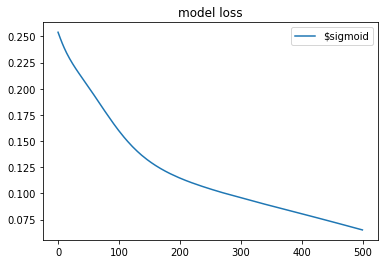

Sigmoid
[[14  0  0]
 [ 0  8  2]
 [ 0  0  6]]


In [19]:
## MODEL - sigmoid
def train_sigmoid(X_train, t_train, X_test, t_test):
    model = Sequential()
    model.add(Dense(8,input_shape=(4,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.compile('adam' ,'mean_squared_error',metrics=['accuracy'])

    history = model.fit(X_train,t_train,epochs=500,verbose=0)
    y_p = model.predict(X_test)

    y_c = np.argmax(y_p,axis=1)
    CM = getCM(y_c,t_test.argmax(axis=1))
    return CM, history.history['loss']


## training
cm, loss = train_sigmoid(X_train, t_train, X_test, t_test)

## plotting loss
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(loss, label='$sigmoid')
plt.title('model loss')
ax.legend()
plt.show()


### confusion matrix
print("Sigmoid")
print(cm)

## **ii. softmax and categorical cross-entropy loss**


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


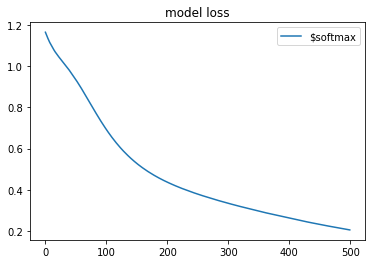

Softmax
[[14  0  0]
 [ 0  9  1]
 [ 0  0  6]]


In [20]:
## MODEL - softmax
def train_softmax(X_train, t_train, X_test, t_test):
    model = Sequential()
    model.add(Dense(8,input_shape=(4,),activation='sigmoid'))
    model.add(Dense(3,activation='softmax'))
    model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

    history = model.fit(X_train,t_train,epochs=500,verbose=0)
    y_p = model.predict(X_test)

    y_c = np.argmax(y_p,axis=1)
    CM = getCM(y_c,t_test.argmax(axis=1))
    return CM, history.history['loss']

## training
cm, loss = train_softmax(X_train, t_train, X_test, t_test)

## plotting loss
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(loss, label='$softmax')
plt.title('model loss')
ax.legend()
plt.show()


### confusion matrix
print("Softmax")
print(cm)

# **Question 2**. **b**.**Comparison**

In [0]:
#### Get average confusion matrix

def avgCM(CM):
    CM = np.array(CM)
    return np.mean(CM, axis=0)

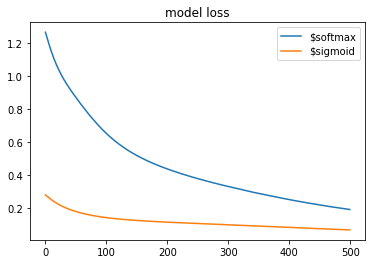

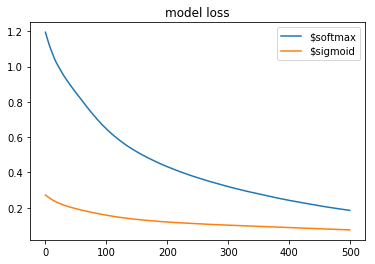

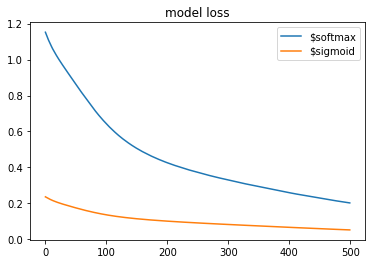

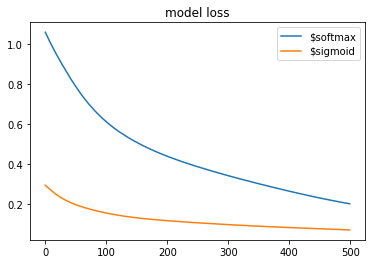

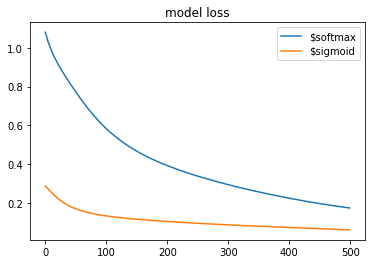

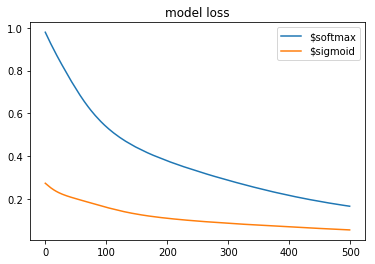

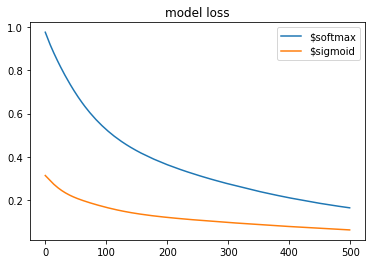

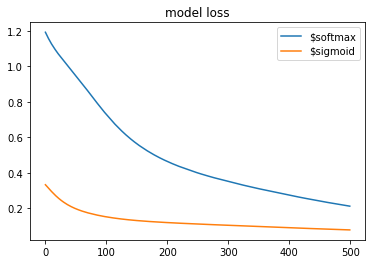

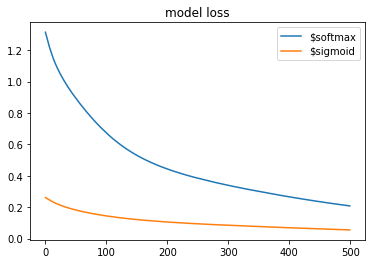

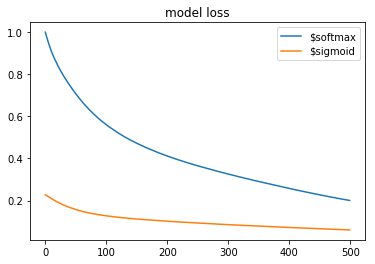

Softmax
[[14.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0.  6.]]
Sigmoid
[[13.8  0.2  0. ]
 [ 0.   8.7  1.3]
 [ 0.   0.   6. ]]


In [22]:


#### Train 10 times 

CM1 = []
CM2 = []
for i in range(10):
    cm, loss1 = train_softmax(X_train, t_train, X_test, t_test)
    CM1.append(cm)
    cm, loss2 = train_sigmoid(X_train, t_train, X_test, t_test)
    CM2.append(cm)

# plot loss 
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(loss1, label='$softmax')
    ax.plot(loss2, label='$sigmoid')
    plt.title('model loss')
    ax.legend()
    plt.show()

# Confusion matrix
print("Softmax")
print(avgCM(CM1))
print("Sigmoid")
print(avgCM(CM2))

## Hence, on an average the performance (confusion matrices) of both the methods are similar.